In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA
import seaborn as sb

In [10]:
df = pd.read_csv('framingham.csv')

# Checking the dataset
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
# Removing the education column as it is not related to our dataset

df.drop("education", axis = 1, inplace = True)

In [12]:
# Checking for shape of the dataset and counts of nulls
df.shape

(4238, 15)

In [13]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [14]:
# Dropping the null values from the dataset 
df.dropna(axis=0, inplace=True)

In [20]:
#checking if drops correctly
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [15]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,7))
fig.set_size_inches(15, 10)
sb.heatmap(corr,vmin=-1, vmax=1, square=True, annot=True, fmt=".2f", cmap="RdBu", center=0, ax=ax)

plt.show()

/var/folders/4t/j0tpqxs11zz8x88ccnwr34rc0000gn/T/ipykernel_36437/2360296715.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


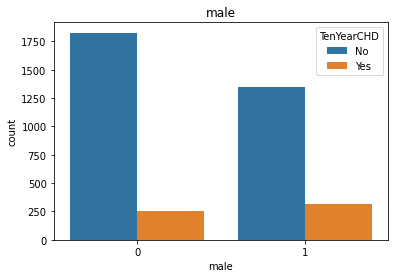

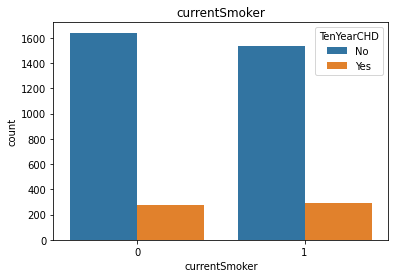

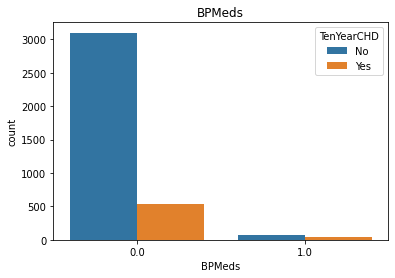

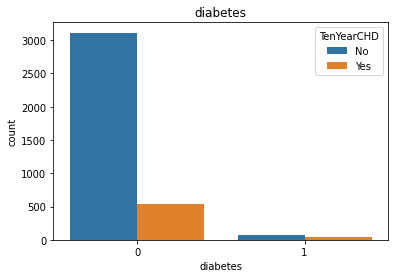

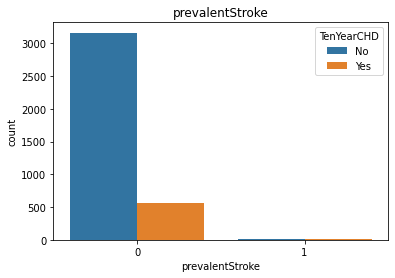

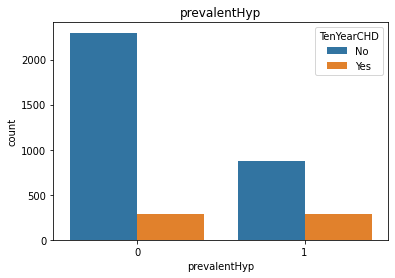

In [10]:
cat_vars = df[['male', 'currentSmoker', 'BPMeds', 'diabetes', 'prevalentStroke', 'prevalentHyp','TenYearCHD']]
for col in cat_vars.columns[:-1]:
    plt. figure()
    sb.countplot(x=col, hue='TenYearCHD', data=cat_vars )
    plt.title(col)
    plt.legend(title='TenYearCHD', labels=['No', 'Yes'])
    plt.show()

In [42]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

generate training and validating the dataset

In [33]:
df.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [43]:

df 
y = df['TenYearCHD']
X = df.drop(columns=['TenYearCHD'])

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1) #testsize if using 60% on data to train
#valid y is true y/ actual results
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

In [46]:
logit_reg_pred = logit_reg.predict(valid_X) #valid x w/o target 
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })
logit_reg_pred #only 400 text size of the data, results 


array([0, 0, 0, ..., 0, 0, 0])

In [47]:
classificationSummary(train_y, logit_reg.predict(train_X)) #60% DATA but not meaniful, its the experience already had, previous symptoms from patients.

classificationSummary(valid_y, logit_reg.predict(valid_X))
#using unknown symptoms of patients (new), using validx (new patient) to predict the actual results (valid y)

#

Confusion Matrix (Accuracy 0.8617)

       Prediction
Actual    0    1
     0 1921    9
     1  302   17
Confusion Matrix (Accuracy 0.8380)

       Prediction
Actual    0    1
     0 1241    6
     1  237   16


## Figure 5: ROC Curve

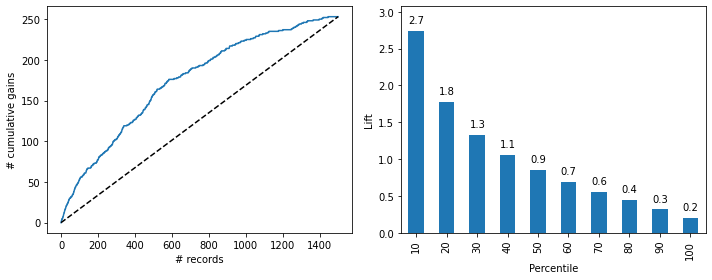

In [48]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()
